In [1]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score
import pandas as pd

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import itertools
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [39]:
from sklearn.linear_model import  LogisticRegression
log=LogisticRegression(C=0.0018329807108324356, penalty='none', solver='sag')
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12)
from sklearn.svm import SVC
svmmodel_w2v= SVC(C=100, gamma=1)
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=141, n_jobs=4,max_depth=161)

In [40]:
cancer=pd.read_csv('DomainCorrect.csv')

In [41]:
cancer

,App,Mins,SpG,KeyP,Rating,Overall rating,BP,CROSSING,FINISHING,ACCELERATION,SPRINT SPEED,REACTIONS,POSITIONING,CLASS
0,0.745763,0.716806,0.527027,0.404762,0.540541,0.809524,0.000000,0.735294,0.916667,0.833333,0.791045,0.921569,0.915254,0
1,0.457627,0.479418,0.527027,0.428571,0.530405,0.761905,0.333333,0.838235,0.888889,0.750000,0.716418,0.803922,0.881356,0
2,0.508475,0.516249,0.378378,0.690476,0.527027,0.809524,0.333333,0.838235,0.805556,0.680556,0.641791,0.843137,0.898305,1
3,0.830508,0.796657,0.567568,0.476190,0.527027,0.809524,0.000000,0.764706,0.916667,0.777778,0.776119,0.745098,0.915254,0
4,0.338983,0.434850,0.527027,0.261905,0.523649,0.642857,0.000000,0.558824,0.791667,0.722222,0.686567,0.686275,0.796610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,0.389831,0.481275,0.391892,0.452381,0.361486,0.619048,0.333333,0.691176,0.694444,0.694444,0.686567,0.549020,0.610169,2
5374,0.254237,0.246982,0.108108,0.214286,0.250000,0.428571,0.333333,0.588235,0.513889,0.541667,0.477612,0.392157,0.508475,2
5375,0.118644,0.213247,0.229730,0.119048,0.209459,0.476190,0.000000,0.338235,0.652778,0.541667,0.507463,0.450980,0.610169,2
5376,0.169492,0.193439,0.162162,0.309524,0.148649,0.595238,0.333333,0.764706,0.638889,0.597222,0.656716,0.490196,0.627119,2


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CLASS', ylabel='Density'>

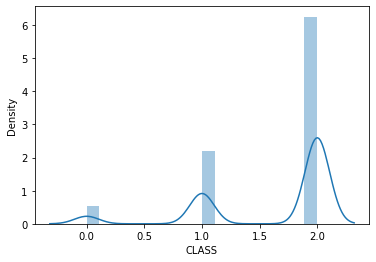

In [42]:
sns.distplot(cancer['CLASS'])

In [44]:
x=cancer.iloc[:,0:13]
y=cancer.iloc[:,13]

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_r,y_r=oversample.fit_resample(X_train,y_train)

In [66]:
from sklearn.ensemble import VotingClassifier
ens = VotingClassifier( estimators= [('log',log),('Random',Random)], voting = 'hard')

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import itertools

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy of Ensemble Algorithm using  Voting classifier on training set: 0.92
Accuracy of Ensemble Algorithm using  Voting classifier on test set: 0.83
accuracy:   0.829
Confusion matrix, without normalization


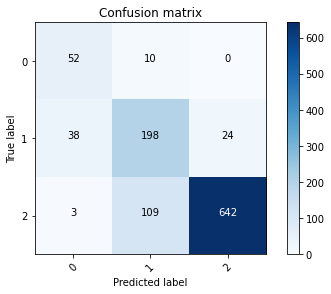

In [69]:
ens=ens.fit(X_r, y_r)
pred = ens.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of Ensemble Algorithm using  Voting classifier on training set: {:.2f}'
     .format(ens.score(X_r, y_r)))
print('Accuracy of Ensemble Algorithm using  Voting classifier on test set: {:.2f}'
     .format(ens.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [71]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.84      0.67        62
           1       0.62      0.76      0.69       260
           2       0.96      0.85      0.90       754

    accuracy                           0.83      1076
   macro avg       0.72      0.82      0.75      1076
weighted avg       0.86      0.83      0.84      1076

